Data Finansial Perbankan digunakan sebagai acuan latihan Data Engineer dan Data Science.

# **DISCLAIMER**

Sumber data yang diambil berasal dari [mockaroo.com](https://mockaroo.com/), sehingga tidak ada sangkut pautnya dan keabsahan data dari Bank tertentu.

Sehingga notebook ini asli dan terhindar dari penyalahgunaan data.

Anda dapat menjalankan notebook ini di local maupun menggunakan Google Colab. Untuk dirunning pada Google Colab, install dan gunakanlah extensi [Google Colab](https://chromewebstore.google.com/detail/open-in-colab/iogfkhleblhcpcekbiedikdehleodpjo?hl=en-US&utm_source=ext_sidebar/) pada perangkat Anda.

# **Tahap 1: Setup**

In [2]:
# Load dan import library terlebih dahulu
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# jika menjalankan notebook dengan Google Colab maka 'execute cell' ini.
from google.colab import drive
drive.mount('/content/drive')
# Membuat variabel path folder
path = '/content/drive/My Drive/Colab Notebooks/datasets/'

In [3]:
# jika menjalankan notebook dengan local device
path = '../datasets/'

In [4]:
# Set datasets
df_finance = pd.read_csv(path + 'mock_data_finansial.csv')

In [5]:
df_finance.head()

,id,nomor_rekening,nama_lengkap,tanggal_transaksi,jumlah_debit,jumlah_kredit,keterangan
0,1,3586494220604830,Janina Braim,10/8/2024,483909.94,807289.24,In quis justo. Maecenas rhoncus aliquam lacus....
1,2,3552081402084905,Lorens Bootland,4/22/2024,877634.99,456497.81,"Maecenas tristique, est et tempus semper, est ..."
2,3,5602219009751139,Lanny Poschel,9/28/2022,828170.95,905812.81,"Mauris enim leo, rhoncus sed, vestibulum sit a..."
3,4,6761178192492842432,Aland Venturoli,2/19/2024,349604.73,308447.20,Praesent id massa id nisl venenatis lacinia. A...
4,5,3588332712127985,Linc Melbourn,3/18/2024,484681.03,210706.49,Curabitur gravida nisi at nibh. In hac habitas...


In [6]:
# Melihat keseluruhan data daftar kolom
df_finance.columns

Index(['id', 'nomor_rekening', 'nama_lengkap', 'tanggal_transaksi',
       'jumlah_debit', 'jumlah_kredit', 'keterangan'],
      dtype='object')

In [7]:
# menghapus kolom tanggal_transaksi, jumlah_debit, jumlah_kredit, dan keterangan,
# karena saya ada kesalahan membuat data dimana ini ialah daftar nasabah
df_finance.drop(columns=['tanggal_transaksi','jumlah_debit','jumlah_kredit','keterangan'], inplace=True)
df_finance.head()

,id,nomor_rekening,nama_lengkap
0,1,3586494220604830,Janina Braim
1,2,3552081402084905,Lorens Bootland
2,3,5602219009751139,Lanny Poschel
3,4,6761178192492842432,Aland Venturoli
4,5,3588332712127985,Linc Melbourn


In [8]:
# cari data nomor_rekening sampel = 3586494220604830, 3552081402084905, 5602219009751139
# karena cuma diberika data tiga sampel teratas
result = df_finance[df_finance['nomor_rekening'] == 3586494220604830]
result.head()

,id,nomor_rekening,nama_lengkap
0,1,3586494220604830,Janina Braim


In [9]:
df_finance_detil_3586494220604830 = pd.read_csv(path + 'mock_data_finansial_detil_3586494220604830.csv')
df_finance_detil_3552081402084905 = pd.read_csv(path + 'mock_data_finansial_detil_3552081402084905.csv')
df_finance_detil_5602219009751139 = pd.read_csv(path + 'mock_data_finansial_detil_5602219009751139.csv')

In [10]:
df_finance_detil_3586494220604830.head()

,id1,id2,tgl_transaksi,jumlah_debit,jumlah_kredit
0,1,3586494220604830,5/26/2004,156717.36,998505.15
1,2,3586494220604830,3/1/2012,831957.30,451042.92
2,3,3586494220604830,9/16/2015,600921.55,42713.03
3,4,3586494220604830,11/27/2001,515920.48,354274.19
4,5,3586494220604830,10/15/2002,151230.06,262405.69


In [11]:
df_finance_detil_3586494220604830.dtypes

id1                int64
id2                int64
tgl_transaksi     object
jumlah_debit     float64
jumlah_kredit    float64
dtype: object

In [12]:
# mengubah tipe data tgl_transaksi 'object' menjadi 'datetime'
df_finance_detil_3586494220604830['tgl_transaksi'] = pd.to_datetime(df_finance_detil_3586494220604830['tgl_transaksi'])

In [13]:
df_finance_detil_3586494220604830.dtypes

id1                       int64
id2                       int64
tgl_transaksi    datetime64[ns]
jumlah_debit            float64
jumlah_kredit           float64
dtype: object

In [14]:
df_finance_detil_3552081402084905.head()

,id1,id2,tgl_transaksi,jumlah_debit,jumlah_kredit
0,1,3552081402084905,9/16/2019,757459.28,838468.74
1,2,3552081402084905,4/25/2019,392011.59,151344.70
2,3,3552081402084905,1/2/2005,450904.68,526232.33
3,4,3552081402084905,10/1/2006,302103.20,417562.83
4,5,3552081402084905,1/24/2003,548022.68,93995.60


In [15]:
df_finance_detil_3552081402084905.dtypes

id1                int64
id2                int64
tgl_transaksi     object
jumlah_debit     float64
jumlah_kredit    float64
dtype: object

In [16]:
df_finance_detil_5602219009751139.head()

,id1,id2,tgl_transaksi,jumlah_debit,jumlah_kredit
0,1,5602219009751139,8/3/2005,687288.30,861926.28
1,2,5602219009751139,9/5/2010,679344.59,257723.93
2,3,5602219009751139,8/9/2021,36080.54,150179.07
3,4,5602219009751139,3/3/2015,131193.45,16952.94
4,5,5602219009751139,7/12/2009,793478.31,214289.04


In [17]:
df_finance_detil_5602219009751139.dtypes

id1                int64
id2                int64
tgl_transaksi     object
jumlah_debit     float64
jumlah_kredit    float64
dtype: object

# **Tahap 2: Functions**

In [18]:
def createColumnTotal(df):
    return df['jumlah_kredit'] - df['jumlah_debit']

In [19]:
def toSum(df):
    return df.sum().round(0)

In [20]:
def ifBalance(value1, value2) :
    if value1.round(0) == value2.round(0) :
        print('total saldo seimbang')
    else :
        print('total saldo tidak seimbang!')

# **Tahap 3: Normalization**

In [21]:
duplicate_norek = df_finance.duplicated(subset='nomor_rekening').sum()
print('Jumlah total duplikasi: ', duplicate_norek)

Jumlah total duplikasi:  0


In [24]:
# Menghapus Duplikasi Data
if duplicate_norek > 0:
    duplicate_norek = duplicate_norek.drop_duplicates(subset='nomor_rekening', keep='first')

    norek1 = duplicate_norek["nomor_rekening"]
    duplikasi_nik = duplicate_norek[norek1.isin(norek1[norek1.duplicated()])].sort_values("nomor_rekening")
else:
    print('Tidak Ada Duplikasi Data!')

Tidak Ada Duplikasi Data!


In [25]:
df_finance.head()

,id,nomor_rekening,nama_lengkap
0,1,3586494220604830,Janina Braim
1,2,3552081402084905,Lorens Bootland
2,3,5602219009751139,Lanny Poschel
3,4,6761178192492842432,Aland Venturoli
4,5,3588332712127985,Linc Melbourn


# **Tahap 4**

## 4.1. Menggabungkan 3 dataframe

Ketika 3 dataframe digabungkan menjadi 1 dataframe data_finansial_detil, setara dengan 1 tabel, dimana 3 dataframe tersebut ialah data detil nasabah

In [26]:
data_finansial_detil = pd.concat([df_finance_detil_3586494220604830, df_finance_detil_3552081402084905, df_finance_detil_5602219009751139], axis=0, ignore_index=True)

# sortir data berdasarkan 'tgl_transaksi' dan ascending
df_finance_detil_3586494220604830['tgl_transaksi'] = pd.to_datetime(df_finance_detil_3586494220604830['tgl_transaksi'], format='%Y-%m-%d')
df_finance_detil_3586494220604830.sort_values(by='tgl_transaksi', ascending=True, inplace=True)

In [27]:
data_finansial_detil.head(10)

,id1,id2,tgl_transaksi,jumlah_debit,jumlah_kredit
0,1,3586494220604830,2004-05-26 00:00:00,156717.36,998505.15
1,2,3586494220604830,2012-03-01 00:00:00,831957.30,451042.92
2,3,3586494220604830,2015-09-16 00:00:00,600921.55,42713.03
3,4,3586494220604830,2001-11-27 00:00:00,515920.48,354274.19
4,5,3586494220604830,2002-10-15 00:00:00,151230.06,262405.69
5,6,3586494220604830,2010-04-21 00:00:00,929130.81,880354.19
6,7,3586494220604830,2008-11-16 00:00:00,142286.08,916167.23
7,8,3586494220604830,2019-10-17 00:00:00,648758.50,724627.16
8,9,3586494220604830,2015-02-04 00:00:00,525516.02,553068.83
9,10,3586494220604830,2017-09-20 00:00:00,531324.12,917921.06


In [28]:
df_finance_detil_3586494220604830.tail(10)

,id1,id2,tgl_transaksi,jumlah_debit,jumlah_kredit
69,70,3586494220604830,2022-09-30,107226.53,255864.04
941,942,3586494220604830,2022-10-01,900197.60,980005.56
627,628,3586494220604830,2022-10-08,827396.36,414662.18
280,281,3586494220604830,2022-10-21,511471.16,770934.57
369,370,3586494220604830,2022-10-24,7704.02,610208.71
33,34,3586494220604830,2022-11-18,943640.06,678269.13
250,251,3586494220604830,2022-11-27,317882.69,888173.94
620,621,3586494220604830,2022-12-05,400649.28,907921.97
648,649,3586494220604830,2022-12-13,692204.05,959819.03
227,228,3586494220604830,2022-12-17,218163.36,591065.06


## 4.2. Jika tidak menggabungkan 3 sampel dataframe

Contoh sampel dataframe yang diberikan:

pilih salah satu

1. df_finance_detil_3586494220604830
2. df_finance_detil_3552081402084905
3. df_finance_detil_5602219009751139



In [ ]:
# membuat kolom baru total dimana total = kredit - debit menggunakan fungsi createColumnTotal() yang sudah dibuat diatas
df_finance_detil_3586494220604830['total'] = createColumnTotal(df_finance_detil_3586494220604830)

# di sortir di bagian ini, sehingga dataframe pada cell selanjutnya akan terus mengikuti data yang sudah difilterisasi ini
df_finance_detil_3586494220604830.sort_values(by='tgl_transaksi', ascending=True, inplace=True)

df_finance_detil_3586494220604830.head()

,id1,id2,tgl_transaksi,jumlah_debit,jumlah_kredit,total
898,899,3586494220604830,2000-01-01,740318.51,766724.98,26406.47
488,489,3586494220604830,2000-01-04,920362.72,344414.06,-575948.66
650,651,3586494220604830,2000-01-06,366436.32,190759.42,-175676.90
305,306,3586494220604830,2000-02-01,845533.60,570077.29,-275456.31
124,125,3586494220604830,2000-02-02,60952.65,533993.88,473041.23


In [30]:
# menormalisasi jika ada total yang dibawah 0 maka dibulatkan menjadi 0
df_finance_detil_3586494220604830['total'] = df_finance_detil_3586494220604830['total'].clip(lower=0)
df_finance_detil_3586494220604830.head()

,id1,id2,tgl_transaksi,jumlah_debit,jumlah_kredit,total
898,899,3586494220604830,2000-01-01,740318.51,766724.98,26406.47
488,489,3586494220604830,2000-01-04,920362.72,344414.06,0.00
650,651,3586494220604830,2000-01-06,366436.32,190759.42,0.00
305,306,3586494220604830,2000-02-01,845533.60,570077.29,0.00
124,125,3586494220604830,2000-02-02,60952.65,533993.88,473041.23


In [31]:
print(df_finance_detil_3586494220604830.dtypes)
df_finance_detil_3586494220604830['tgl_transaksi'] = pd.to_datetime(df_finance_detil_3586494220604830['tgl_transaksi'], format='%d-%m-%Y')
print('\n', df_finance_detil_3586494220604830.dtypes)


id1                       int64
id2                       int64
tgl_transaksi    datetime64[ns]
jumlah_debit            float64
jumlah_kredit           float64
total                   float64
dtype: object

 id1                       int64
id2                       int64
tgl_transaksi    datetime64[ns]
jumlah_debit            float64
jumlah_kredit           float64
total                   float64
dtype: object


# **Tahap 5**

## 5.1. Mencari "Total"

gunakan salah satunya untuk mencari :
1. total_kredit
2. total_debit
3. total_kolom_saldo
4. total_baris_saldo
5. apakah 'balance'?

In [32]:
total_kredit = toSum(df_finance_detil_3586494220604830['jumlah_kredit'])
print('total_kredit : ', total_kredit)

total_debit = toSum(df_finance_detil_3586494220604830['jumlah_debit'])
print('total_debit : ', total_debit)

total_kolom_saldo = toSum(df_finance_detil_3586494220604830['total'])
print('total_kolom_saldo : ', total_kolom_saldo)

total_baris_saldo = total_kredit - total_debit
print('total_baris_saldo : ', total_baris_saldo)

ifBalance(total_baris_saldo, total_kolom_saldo)


total_kredit :  504873268.0
total_debit :  509934468.0
total_kolom_saldo :  158668251.0
total_baris_saldo :  -5061200.0
total saldo tidak seimbang!


## 5.2. Mencari data berdasarkan tanggal

Gunakan variabel *`'search_date', 'search_month', 'search_year'`* untuk mencari data.

Dan pilih salah satu cell pencarian data untuk mendapatkan hasil dan outputnya

### 5.2.1. Step 1: Search Data

In [ ]:
# berdasarkan tanggal spesifik
search_date = '01-01-2024'
df_finance_detil_filtered_search_date = df_finance_detil_3586494220604830[df_finance_detil_3586494220604830['tgl_transaksi'] == search_date]
df_finance_detil_filtered_search_date.head(100)

In [ ]:
# berdasarkan antara 2 tanggal spesifik
search_date1 = '01-01-2001'
search_date2 = '30-06-2001'

df_finance_detil_filtered_search_date = df_finance_detil_3586494220604830[(df_finance_detil_3586494220604830['tgl_transaksi'] >= search_date1) & (df_finance_detil_3586494220604830['tgl_transaksi'] <= search_date2)]
df_finance_detil_filtered_search_date.head(100)

In [ ]:
# berdasarkan bulan dan tahun
search_month = 11
search_year = 2001
df_finance_detil_filtered_search_date = df_finance_detil_3586494220604830[(df_finance_detil_3586494220604830['tgl_transaksi'].dt.month == search_month) & (df_finance_detil_3586494220604830['tgl_transaksi'].dt.year == search_year)]
df_finance_detil_filtered_search_date.head(100)

In [33]:
# berdasarkan antara 2 bulan dan 2 tahun tertentu secara spesifik
search_month1 = 1
search_year1 = 2001

search_month2 = 6
search_year2 = 2001

df_finance_detil_filtered_search_date = df_finance_detil_3586494220604830[
                                            (
                                                (df_finance_detil_3586494220604830['tgl_transaksi'].dt.month >= search_month1)
                                                &
                                                (df_finance_detil_3586494220604830['tgl_transaksi'].dt.year >= search_year1)
                                            )
                                            &
                                            (
                                                (df_finance_detil_3586494220604830['tgl_transaksi'].dt.month <= search_month2)
                                                &
                                                (df_finance_detil_3586494220604830['tgl_transaksi'].dt.year <= search_year2)
                                            )
                                        ]
df_finance_detil_filtered_search_date.head(100)

,id1,id2,tgl_transaksi,jumlah_debit,jumlah_kredit,total
656,657,3586494220604830,2001-01-04,892823.17,127213.97,0.00
399,400,3586494220604830,2001-02-01,435448.45,351298.57,0.00
454,455,3586494220604830,2001-02-13,64856.96,740381.68,675524.72
154,155,3586494220604830,2001-02-16,68098.40,155543.54,87445.14
583,584,3586494220604830,2001-02-19,807466.18,880167.76,72701.58
363,364,3586494220604830,2001-03-05,238666.51,452525.64,213859.13
247,248,3586494220604830,2001-03-17,196690.45,485058.83,288368.38
728,729,3586494220604830,2001-03-20,927702.16,303042.52,0.00
114,115,3586494220604830,2001-04-08,62580.31,935403.60,872823.29
334,335,3586494220604830,2001-04-11,534789.23,951642.62,416853.39


In [ ]:
# berdasarkan tahun
search_year = 2001
df_finance_detil_filtered_search_date = df_finance_detil_3586494220604830[df_finance_detil_3586494220604830['tgl_transaksi'].dt.year == search_year]
df_finance_detil_filtered_search_date.head(100)

In [ ]:
# berdasarkan diantara 2 tahun tertentu secara spesifik
search_year1 = 2001
search_year2 = 2005

df_finance_detil_filtered_search_date = df_finance_detil_3586494220604830[
                                            (df_finance_detil_3586494220604830['tgl_transaksi'].dt.year >= search_year1)
                                            &
                                            (df_finance_detil_3586494220604830['tgl_transaksi'].dt.year <= search_year2)
                                        ]
df_finance_detil_filtered_search_date.head(100)

### 5.2.2. Step 2 : Total and ifBalance

In [35]:
total_kredit_filtered_search_date = toSum(df_finance_detil_3586494220604830['jumlah_kredit'])
total_debit_filtered_search_date = toSum(df_finance_detil_3586494220604830['jumlah_debit'])
total_baris_saldo_filtered_search_date = total_kredit_filtered_search_date - total_debit_filtered_search_date
total_kolom_saldo_filtered_search_date = toSum(df_finance_detil_3586494220604830['total'])

print('total_kredit_filtered_search_date : ', total_kredit_filtered_search_date)
print('total_debit_filtered_search_date : ', total_debit_filtered_search_date)
print('total_baris_saldo_filtered_search_date : ', total_baris_saldo_filtered_search_date)
print('total_kolom_saldo_filtered_search_date : ', total_kolom_saldo_filtered_search_date)

ifBalance(total_baris_saldo, total_kolom_saldo)


total_kredit_filtered_search_date :  504873268.0
total_debit_filtered_search_date :  509934468.0
total_baris_saldo_filtered_search_date :  -5061200.0
total_kolom_saldo_filtered_search_date :  158668251.0
total saldo tidak seimbang!


### 5.2.3. Step 3 : Finalization

untuk hasil akhir, pada bagian kolom *`jumlah_debit, jumlah_kredit, total`* tipe datanya akan diubat `(numeric to string)` agar format data angka menjadi mudah untuk dibaca

In [37]:
df_finance_detil_3586494220604830['jumlah_debit'] = df_finance_detil_3586494220604830['jumlah_debit'].apply(lambda x: '{:,.2f}'.format(x))
df_finance_detil_3586494220604830['jumlah_kredit'] = df_finance_detil_3586494220604830['jumlah_kredit'].apply(lambda x: '{:,.2f}'.format(x))
df_finance_detil_3586494220604830['total'] = df_finance_detil_3586494220604830['total'].apply(lambda x: '{:,.2f}'.format(x))

ValueError: Unknown format code 'f' for object of type 'str'

In [38]:
df_finance_detil_3586494220604830.head(100)

,id1,id2,tgl_transaksi,jumlah_debit,jumlah_kredit,total
898,899,3586494220604830,2000-01-01,"740,318.51","766,724.98","26,406.47"
488,489,3586494220604830,2000-01-04,"920,362.72","344,414.06",0.00
650,651,3586494220604830,2000-01-06,"366,436.32","190,759.42",0.00
305,306,3586494220604830,2000-02-01,"845,533.60","570,077.29",0.00
124,125,3586494220604830,2000-02-02,"60,952.65","533,993.88","473,041.23"
...,...,...,...,...,...,...
925,926,3586494220604830,2002-02-23,"178,473.54","2,655.59",0.00
244,245,3586494220604830,2002-03-06,"676,755.72","508,040.57",0.00
967,968,3586494220604830,2002-03-19,"350,658.23","307,356.54",0.00
753,754,3586494220604830,2002-03-20,"800,861.89","942,758.36","141,896.47"


## 5.3. Grafik Data

Sudah tidak ada menghitung menggunakan rumus. Data yang diambil berdasarkan hasil perhitungan diatas, sehingga hanya menampilkan data berupa grafik.



Grafik Pencarian Data, 3 Gambar terpisah yang telah dibuat:

Grafik Kredit


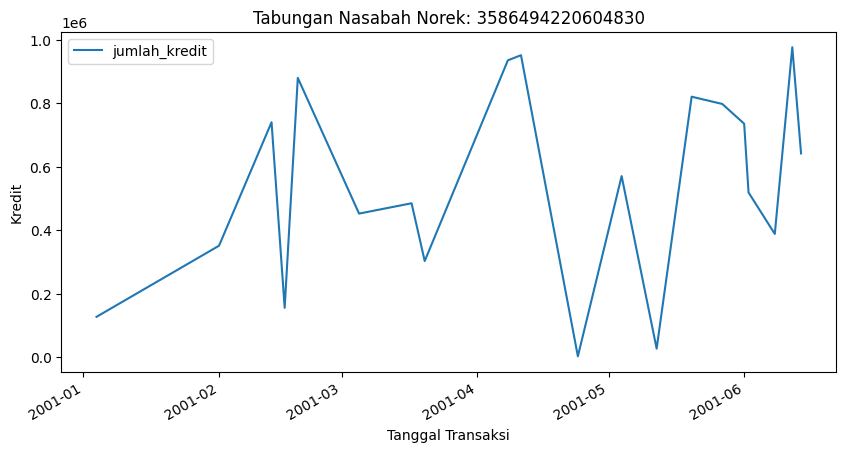


Grafik Debet


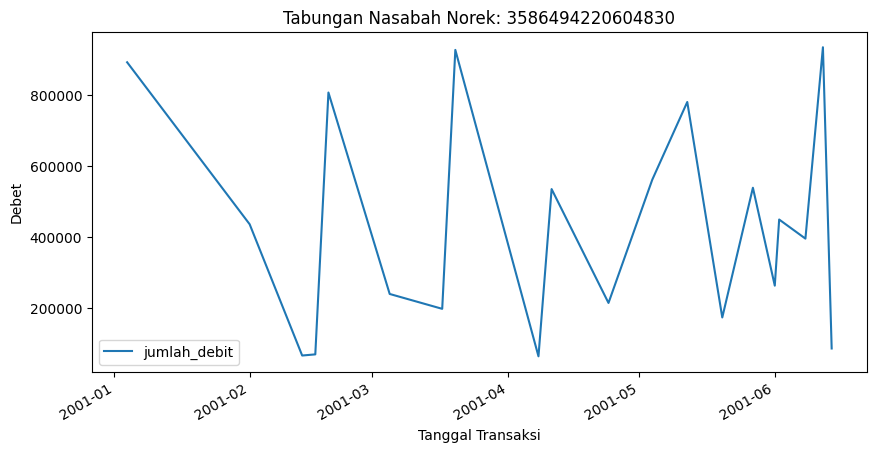


Grafik Total


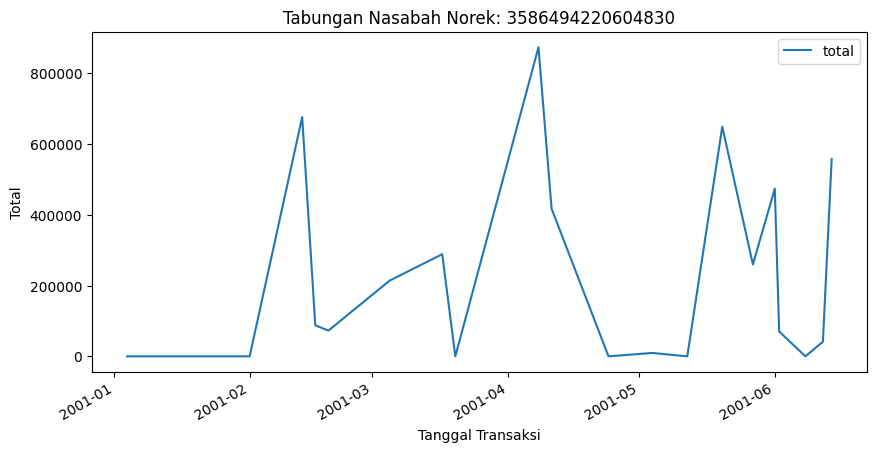

In [45]:
print('\nGrafik Pencarian Data, 3 Gambar terpisah yang telah dibuat:')

print('\nGrafik Kredit')
df_finance_detil_filtered_search_date.set_index('tgl_transaksi')[['jumlah_kredit']].plot(
    figsize=(10, 5),
    title='Tabungan Nasabah Norek: 3586494220604830'
)
plt.ylabel('Kredit')
plt.xlabel('Tanggal Transaksi')
plt.show()

print('\nGrafik Debet')
df_finance_detil_filtered_search_date.set_index('tgl_transaksi')[['jumlah_debit']].plot(
    figsize=(10, 5),
    title='Tabungan Nasabah Norek: 3586494220604830'
)
plt.ylabel('Debet')
plt.xlabel('Tanggal Transaksi')
plt.show()


print('\nGrafik Total')
df_finance_detil_filtered_search_date.set_index('tgl_transaksi')[['total']].plot(
    figsize=(10, 5),
    title='Tabungan Nasabah Norek: 3586494220604830'
)
plt.ylabel('Total')
plt.xlabel('Tanggal Transaksi')
plt.show()